## **DATA SCIENCE AND BUSINESS ANALYTICS** - **THE SPARKS FOUNDATION**

# **AUTHOR: ARVIN ELEGIDO**

# **EXPLORATORY DATA ANALYSIS - RETAIL STORE**

# **TASK**
● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?

# **IMPORTING LIBRARIES AND DATASET**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
store = pd.read_csv('/content/drive/MyDrive/Sparks Foundation/Data Science and Business Analytics/TASK 3/SampleSuperstore.csv')

# **DATA CLEANING**

In [4]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
store.shape

(9994, 13)

In [6]:
duplicate_rows=store[store.duplicated()].shape
print('No. of duplicates:',duplicate_rows)

No. of duplicates: (17, 13)


**DROP DUPLICATE VALUES**

In [7]:
store = store.drop_duplicates()
store.shape

(9977, 13)

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [ ]:
store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**POSTAL CODE IS NOT NECESSARY FOR OUR ANALYSIS**

In [8]:
store.drop(columns=['Postal Code'], inplace=True)

In [ ]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**THERE WHERE NO NULL VALUES**

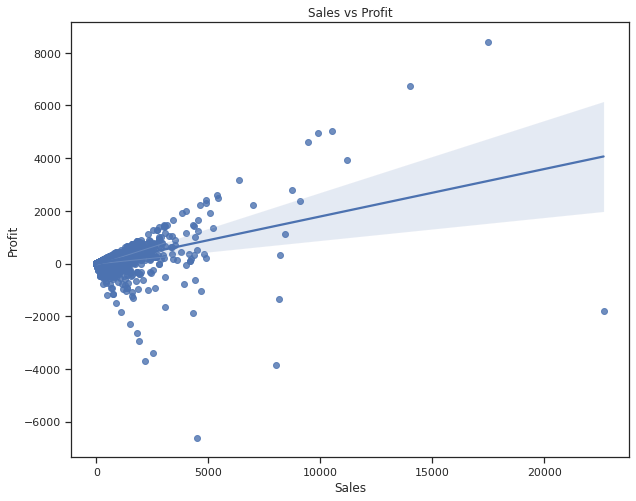

In [9]:
sns.set(style="ticks", rc={"figure.figsize":(10,8)})
sns.regplot(x="Sales", y="Profit", data=store)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()

The scatterplot shows a positive correlation between Sales and Profit, indicating that higher sales lead to higher profits. However, there are also many data points where the sales are high but the profits are low or negative. This suggests that the company needs to identify and address the factors that are reducing the profit margin.

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     2971.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:56:41   Log-Likelihood:                -67303.
No. Observations:                9977   AIC:                         1.346e+05
Df Residuals:                    9975   BIC:                         1.346e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7556      2.196     -5.808      0.0

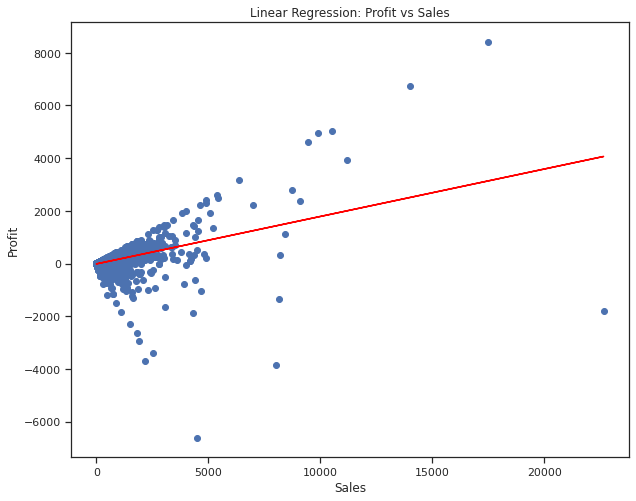

In [12]:
model = sm.formula.ols(formula='Profit ~ Sales', data=store).fit()
print(model.summary())
plt.scatter(store['Sales'], store['Profit'])
plt.plot(store['Sales'], model.predict(store['Sales']), color='red')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Linear Regression: Profit vs Sales')
plt.show()

The R-squared value of 0.23 indicates that approximately 23% of the variation in profit can be explained by sales. The coefficient for sales is positive, which suggests that there is a positive relationship between sales and profit.

The p-value for the intercept and sales are both less than 0.05, indicating that they are statistically significant predictors of profit. The coefficient for sales is also statistically significant at the 0.05 level, meaning that there is evidence to suggest that the relationship between sales and profit is not due to chance.

The Omnibus test and Jarque-Bera test are both tests for normality of residuals, and their low p-values suggest that the residuals may not be normally distributed.

Overall, the model suggests that sales are a significant predictor of profit, but it is important to keep in mind that the R-squared value of 0.23 indicates that there may be other important variables not included in this model that could also be impacting profit.

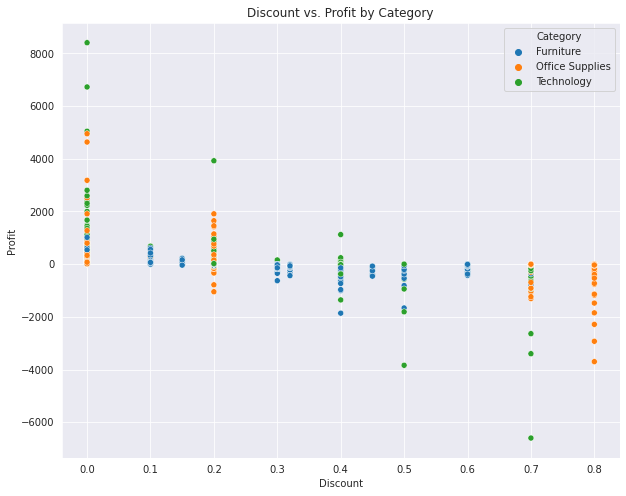

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(data=store, x='Discount', y='Profit', hue='Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount vs. Profit by Category')
plt.show()

Based on the scatter plot of Profit vs Discount, it appears that giving discounts of more than 20% leads to negative profits for the company. In fact, the majority of data points with discounts above 20% are in the negative profit range. This suggests that the company should consider limiting discounts to less than 20% in order to maintain profitability. Overall, the data suggests that discount strategies should be carefully evaluated to maximize profitability for the company.

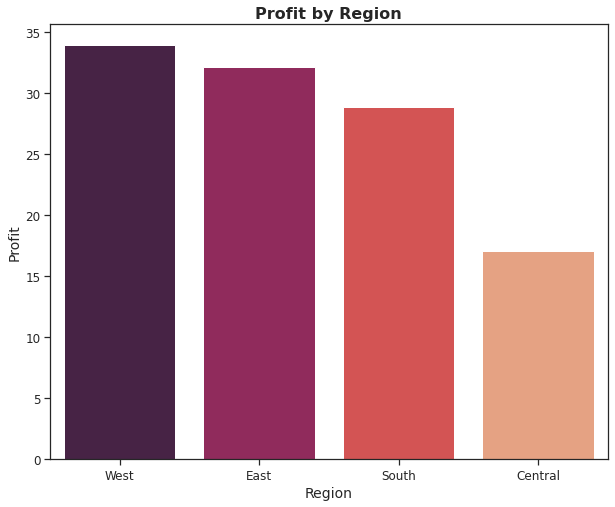

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Region', y='Profit', data=store, order=store.groupby('Region')['Profit'].mean().sort_values(ascending=False).index, palette='rocket',ci=None)
plt.title('Profit by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The bar chart shows the total profit earned by each region. The West region has the highest profit, followed by the East and South regions. The Central region has the lowest profit. The company should investigate why the Central region is not performing well and try to improve it.

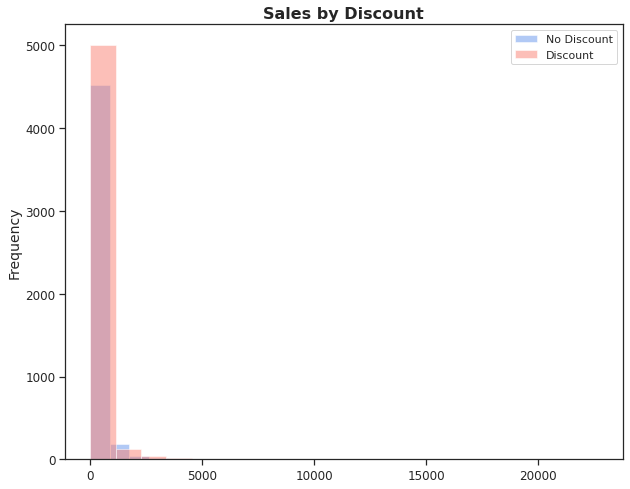

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(store[store['Discount'] == 0]['Sales'], alpha=0.5, label='No Discount', bins=20, color='cornflowerblue')
plt.hist(store[store['Discount'] > 0]['Sales'], alpha=0.5, label='Discount', bins=20, color='salmon')
plt.ylabel('Frequency', fontsize=14)
plt.title('Sales by Discount', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

The histogram of sales by discount provides insight into the relationship between discounts and sales. It shows that discounts can be an effective way to increase sales.

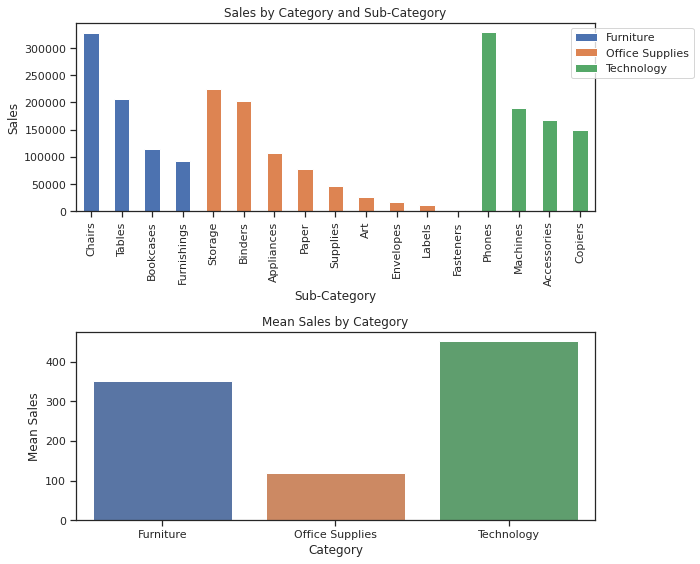

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))
category_sales = store.groupby(['Sub-Category', 'Category'])['Sales'].sum().unstack()
category_sales = category_sales.sort_values(by=category_sales.columns.tolist(), ascending=False)
category_sales.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Sales')
ax1.set_title('Sales by Category and Sub-Category')
ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
category_mean = store.groupby('Category')['Sales'].mean()
sns.barplot(x=category_mean.index, y=category_mean.values, ax=ax2)
ax2.set_xlabel('Category')
ax2.set_ylabel('Mean Sales')
ax2.set_title('Mean Sales by Category')
plt.tight_layout()
plt.show()

This table summarizes the sales performance of three categories of products: Furniture, Office Supplies, and Technology. The Technology category is the most profitable, with a mean sales of over $209,000. 

Followed by Furniture with a mean sales of $185,326. 

The Office Supplies category is the least profitable, with a mean sales of $79,859.

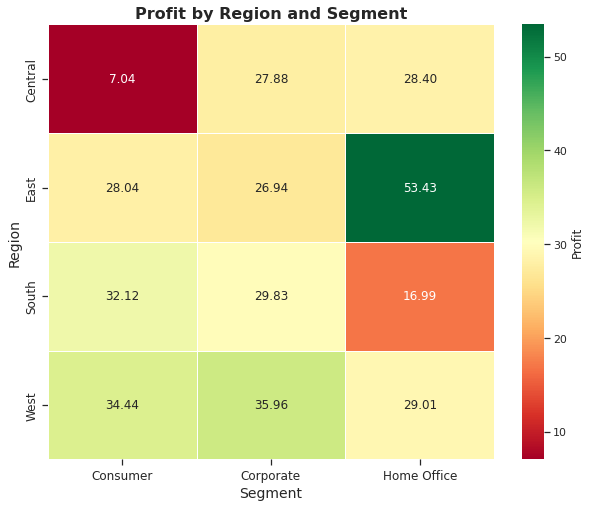

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
profit_by_region_segment = pd.pivot_table(store, index='Region', columns='Segment', values='Profit')
sns.heatmap(profit_by_region_segment, cmap='RdYlGn', annot=True, fmt='.2f', linewidths=1, ax=ax, cbar_kws={'label': 'Profit'})
ax.set_title('Profit by Region and Segment', fontsize=16, fontweight='bold')
ax.set_xlabel('Segment', fontsize=14)
ax.set_ylabel('Region', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()



The heatmap provides insight into the profitability of different market segments in different regions, which can help the company to make data-driven decisions regarding its marketing and sales strategies.

<Figure size 720x576 with 0 Axes>

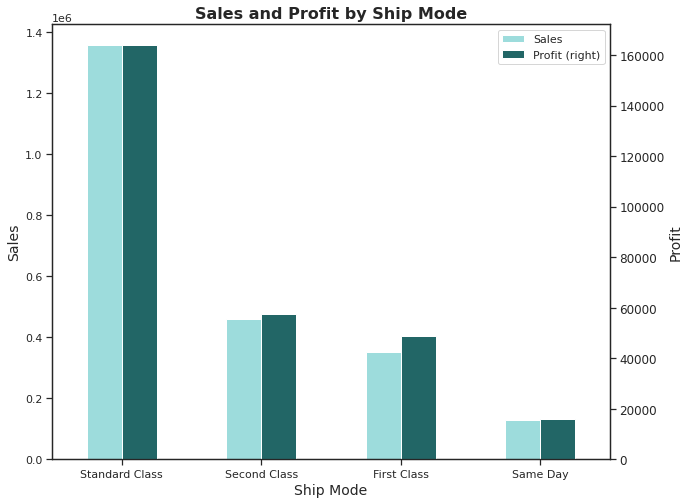

In [ ]:
plt.figure(figsize=(10, 8))
ship_mode_sales_profit = store.groupby('Ship Mode')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
ax = ship_mode_sales_profit.plot(kind='bar', secondary_y='Profit', rot=0, color=['#9DDCDC', '#226666'])
ax.set_xlabel('Ship Mode', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
ax.right_ax.set_ylabel('Profit', fontsize=14)
ax.set_title('Sales and Profit by Ship Mode', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The data shows the sales and profit generated by different shipping modes. The Standard Class shipping mode has the highest sales and profit, with a total sales of 1.36 million dollars and a profit of 163,969 dollars. This is followed by Second Class with total sales of 459,177 dollars and a profit of 57,446 dollars. First Class and Same Day shipping modes have lower sales and profit compared to the other two modes.

Based on this data, it can be recommended to focus on the Standard Class shipping mode as it generates the highest sales and profit for the business. The business can also look into ways to improve the performance of the other shipping modes to increase sales and profit.

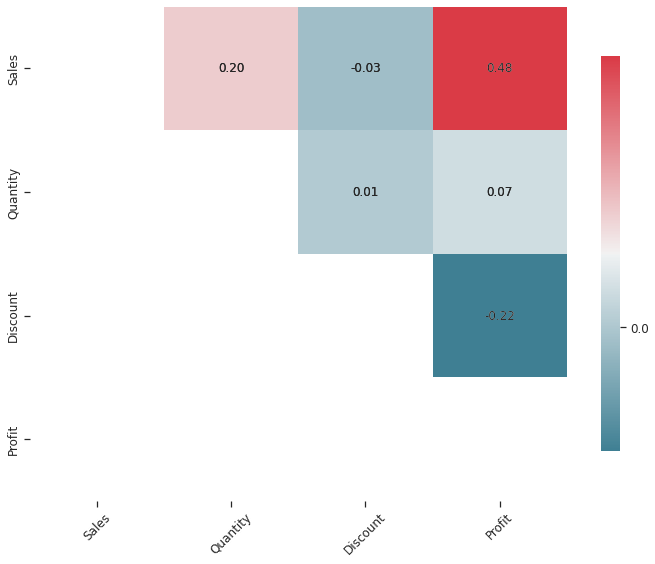

In [ ]:
corr_matrix = store.corr()
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt='.2f', ax=ax, cbar_kws={"shrink": 0.8, "ticks": [-1, -0.5, 0, 0.5, 1]}, annot_kws={"fontsize":12})
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        ax.text(j+0.5, i+0.5, format(corr_matrix.iloc[i,j], ".2f"), ha="center", va="center", fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The correlation matrix shows the correlation coefficients between Sales, Quantity, Discount, and Profit. Sales and Profit have a moderate positive correlation of 0.48, while the other variables have weak correlations with each other. There is a weak positive relationship between Sales and Quantity, a weak negative relationship between Sales and Discount, and a weak negative relationship between Discount and Profit. These findings suggest that businesses should consider the weak relationships between the variables when making decisions about pricing, discounts, and sales strategies.

<ipython-input-84-8fe223de318f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tick_labels)


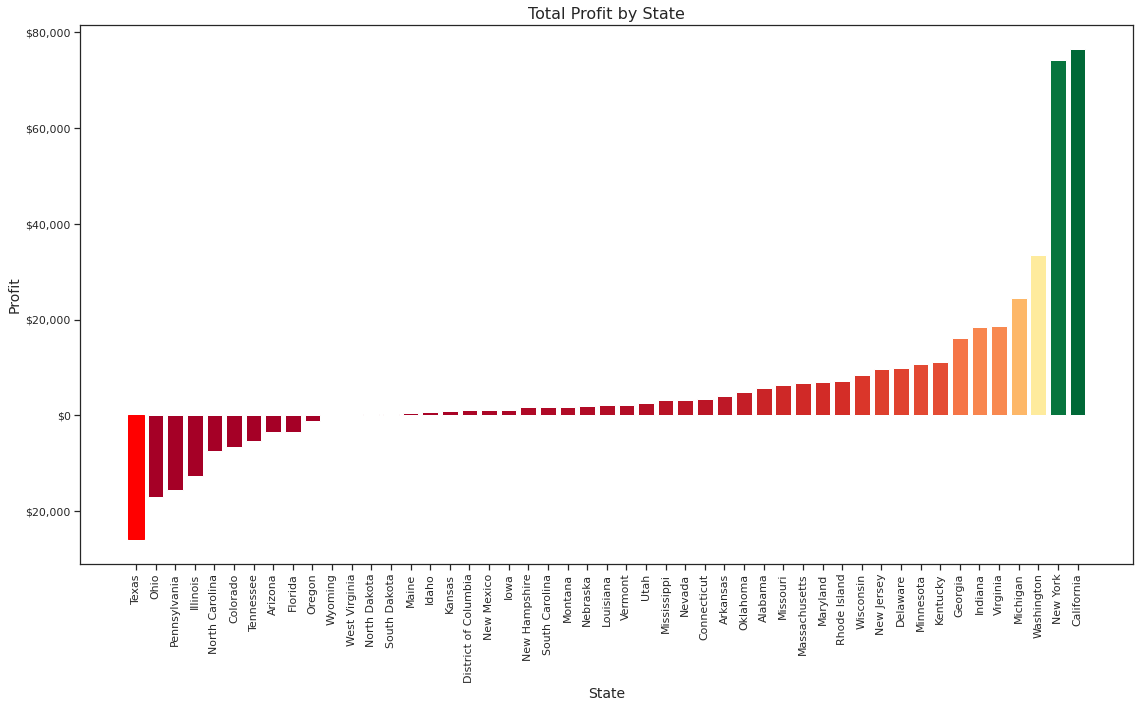

In [ ]:
state_profit = store.groupby('State')['Profit'].sum().sort_values()
cmap = plt.get_cmap('RdYlGn')
fig, ax = plt.subplots(figsize=(16, 10))
bars = ax.bar(state_profit.index, state_profit.values, color=cmap(state_profit/state_profit.abs().max()))
bars[0].set_color('red')
ax.set_title('Total Profit by State', fontsize=16)
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Profit', fontsize=14)
tick_labels = [f'${abs(x):,.0f}' for x in ax.get_yticks()]
ax.set_yticklabels(tick_labels)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This data shows the total profit earned by a store in various states of the United States. The highest profits were earned in California and New York, with profits exceeding 75,000 and 74,000, respectively. Michigan and Washington also earned considerable profits, with both exceeding 24,000 and 33,000, respectively.

On the other hand, the lowest profits were earned in Texas, Ohio, and Pennsylvania, with losses exceeding 25,000, 16,000, and 15,000 respectively. 

Overall, the data suggests that the store has been successful in some states, while struggling in others. Further analysis could be done to understand why some states are more profitable than others, such as examining differences in customer behavior, competition, or market conditions.


**FINDINGS**

1. There is positive correlation between Sales and Profit, indicating that higher sales lead to higher profits. However, there are also many data points where the sales are high but the profits are low or negative.
2. It is evident that the company is struggling to maintain profits with increasing discounts. The data suggests that discounts of 20% or more lead to more losses than profits. On the other hand, discounts between 10% and 20% tend to have a positive impact on sales and profit.
3. The Central region is not performing well, and the company needs to investigate and improve its performance.
4. Discounts can be an effective way to increase sales, but it is important to understand the negative relationship between discounts and profit.
5. The Technology category is the most profitable, followed by Furniture, and Office Supplies is the least profitable. 
6. The company can use the insights provided by the heatmap to make data-driven decisions regarding its marketing and sales strategies.
7. The Standard Class shipping mode generates the highest sales and profit for the business, and the company can focus on improving the performance of other shipping modes to increase sales and profit.
8. There is a moderate positive correlation between Sales and Profit, while the other variables have weak correlations with one another. Businesses need to understand these relationships when making decisions about pricing, discounts, and sales strategies.
9. We found that California and New York are the two states with the highest total profits, while Texas and Ohio have the largest total losses.

**RECOMMENDATIONS**



1. The company should focus on identifying and addressing the factors that are causing a reduction in profit margins despite higher sales. This could involve evaluating their pricing strategies, managing their inventory more effectively, or finding ways to reduce their operating costs.

2. It is clear from the data that offering discounts of more than 20% tends to result in more losses than profits. Therefore, the company should carefully evaluate its discount policies and focus on offering discounts between 10% and 20% to have a positive impact on sales and profits.

3. The Central region is underperforming, and the company needs to investigate and improve its performance. This could involve evaluating their marketing strategies in this region or identifying other factors that are affecting sales and profitability.

4. While discounts can be an effective way to increase sales, the negative relationship between discounts and profit needs to be carefully considered. The company should be mindful of this relationship when offering discounts and evaluate the impact of these discounts on profit margins.

5. The company can focus on improving the sales and profitability of the Office Supplies category, which is currently the least profitable. This could involve exploring new marketing strategies or identifying ways to reduce the cost of goods sold for this category.

6. The heatmap provides valuable insights into the relationships between different variables, and the company can use this information to make data-driven decisions regarding its marketing and sales strategies. For example, they can focus on promoting products that have a high correlation with sales and profit.

7. While the Standard Class shipping mode generates the highest sales and profit, the company should also focus on improving the performance of other shipping modes to increase sales and profit. This could involve offering faster shipping options or evaluating the cost of different shipping modes.

8. Businesses need to understand the correlations between different variables when making decisions about pricing, discounts, and sales strategies. The moderate positive correlation between Sales and Profit suggests that businesses should focus on increasing their sales to improve profitability, but they should also consider other factors that affect profit margins.
9. To increase profits, we recommend focusing on expanding the business in states with high profitability, such as California and New York, while implementing measures to reduce losses in states with negative profitability, such as Texas and Ohio. Additionally, strategies to increase the number of orders, such as marketing campaigns and promotions, could be implemented to further boost profits.